# Air Quality Dataset

From the Kaggle Dataset containing sensor measuremenats for Air Quality, we extract correlation
measurements. We perform filtering on these signals (simultaneously), we extract correlation
and extraxt features and signal properties out of these

## Step 1: Initialization

In [1]:
import pandas as pd
from caits import visualization, filtering, properties
from caits.fe import signal_stats
from caits.eda import correlation
import seaborn as sns


In [2]:
data = pd.read_csv(
    "data/AirQuality.csv",
    sep=";").drop(
    columns=[
        "Date",
        "Time",
        "Unnamed: 15",
        "Unnamed: 16"
    ]
)

data = data.apply(lambda col: col.str.replace(",", ".").astype(float) if col.dtypes == "object" else col)
data = data.fillna(0)

In [3]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### Plot the Air Quality Measurements

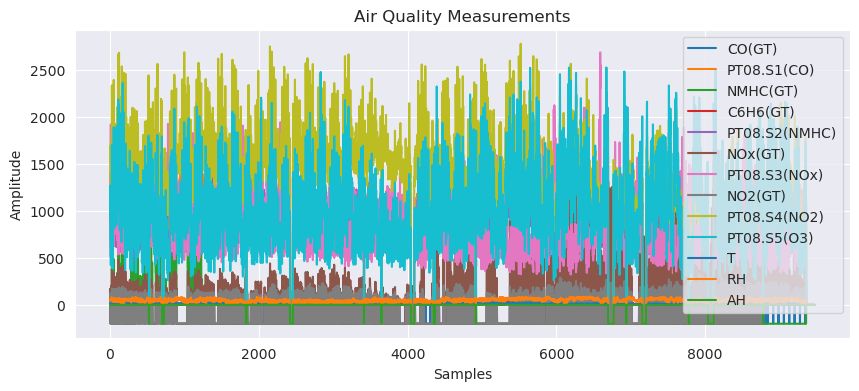

In [4]:
init_fig = visualization.plot_signal(
    data.values,
    channels=data.columns.tolist(),
    title="Air Quality Measurements"
)

### Print various statistics of the signals


In [5]:
stats = [
    signal_stats(data[col].values, col)
    for col in data.columns
]

for s in stats:
    for k, v in s.items():
        print(f"{k}: {v}")
    print("---------------------------------------")

CO(GT)_max: 11.9
CO(GT)_min: -200.0
CO(GT)_mean: -33.79577658114244
CO(GT)_median: 1.5
CO(GT)_std: 77.2743518484747
CO(GT)_var: 5971.325453601864
CO(GT)_kurtosis: 0.841677463171774
CO(GT)_skewness: -1.685382763668135
CO(GT)_rms: 84.34144869709293
CO(GT)_crest_factor: 2.3713133114216185
CO(GT)_signal_length: 0.21476190476190476
---------------------------------------
PT08.S1(CO)_max: 2040.0
PT08.S1(CO)_min: -200.0
PT08.S1(CO)_mean: 1036.3636363636363
PT08.S1(CO)_median: 1050.0
PT08.S1(CO)_std: 347.2091940549927
PT08.S1(CO)_var: 120554.22443631756
PT08.S1(CO)_kurtosis: 4.855653476724188
PT08.S1(CO)_skewness: -1.6805821235311562
PT08.S1(CO)_rms: 1092.979327898372
PT08.S1(CO)_crest_factor: 1.8664579904933796
PT08.S1(CO)_signal_length: 0.21476190476190476
---------------------------------------
NMHC(GT)_max: 1189.0
NMHC(GT)_min: -200.0
NMHC(GT)_mean: -157.17516629711753
NMHC(GT)_median: -200.0
NMHC(GT)_std: 140.01677139806938
NMHC(GT)_var: 19604.696272739217
NMHC(GT)_kurtosis: 18.2464693898

### Correlations

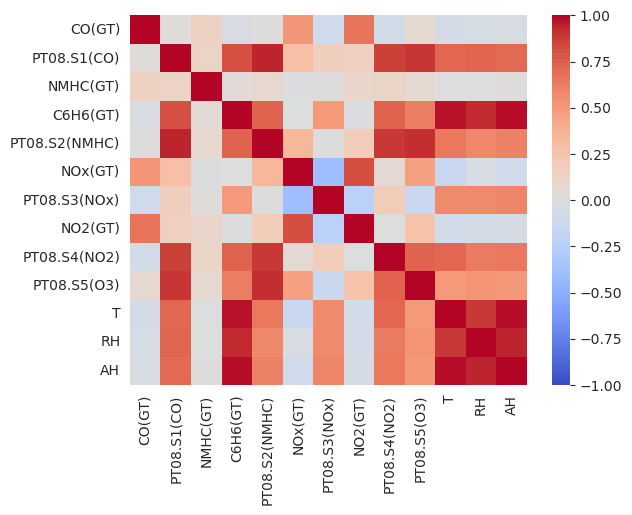

In [6]:
signal_correlations = data.corr()

fig = sns.heatmap(signal_correlations, annot=False, cmap="coolwarm", vmin=-1, vmax=1)


In [7]:
highly_corr_features = correlation.get_high_corr_features_df(data, 0.9)
highly_corr_data = data[highly_corr_features]
highly_corr_data.head()

,PT08.S2(NMHC),PT08.S5(O3),T,RH,AH
0,1046.0,1268.0,13.6,48.9,0.7578
1,955.0,972.0,13.3,47.7,0.7255
2,939.0,1074.0,11.9,54.0,0.7502
3,948.0,1203.0,11.0,60.0,0.7867
4,836.0,1110.0,11.2,59.6,0.7888


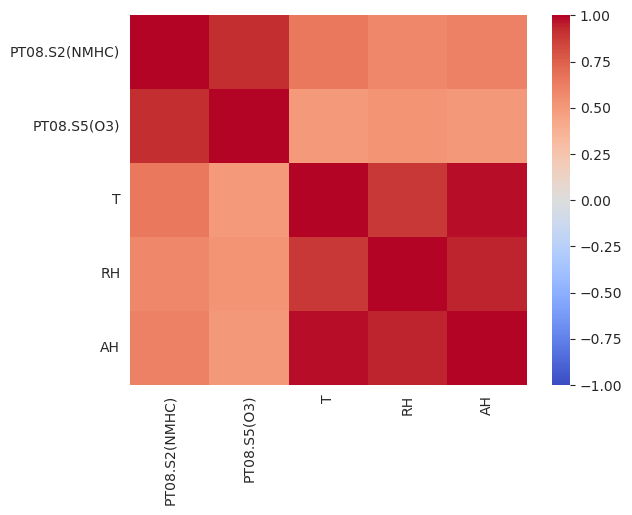

In [8]:
signal_correlations = highly_corr_data.corr()

fig = sns.heatmap(signal_correlations, annot=False, cmap="coolwarm", vmin=-1, vmax=1)

## Step 2: Filtering

We perform a Gaussian Filter on all timeseries simultaneously

In [9]:
filtered_data = filtering.filter_gaussian(data.values)

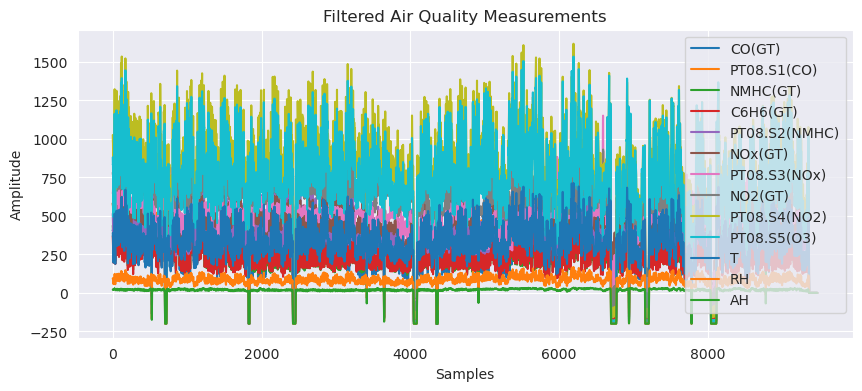

In [10]:
filtered_fig = visualization.plot_signal(
    filtered_data,
    channels = data.columns.tolist(),
    title="Filtered Air Quality Measurements"
)

### Print various statistics of the signals


In [11]:
filtered_data_df = pd.DataFrame(filtered_data, columns=data.columns)

stats = [
    signal_stats(filtered_data_df[col].values, col)
    for col in filtered_data_df.columns
]

for s in stats:
    for k, v in s.items():
        print(f"{k}: {v}")
    print("---------------------------------------")

CO(GT)_max: 602.7834934887135
CO(GT)_min: -200.0
CO(GT)_mean: 276.0086869289514
CO(GT)_median: 288.99840453697425
CO(GT)_std: 111.52869169043908
CO(GT)_var: 12438.649070181013
CO(GT)_kurtosis: 2.375657331504633
CO(GT)_skewness: -1.147856589689986
CO(GT)_rms: 297.6901817837212
CO(GT)_crest_factor: 2.0248685726781868
CO(GT)_signal_length: 0.21476190476190476
---------------------------------------
PT08.S1(CO)_max: 965.1122070868987
PT08.S1(CO)_min: -200.0
PT08.S1(CO)_mean: 374.0271152739772
PT08.S1(CO)_median: 376.6593860458845
PT08.S1(CO)_std: 147.32674694887723
PT08.S1(CO)_var: 21705.170366538503
PT08.S1(CO)_kurtosis: 4.076889307292731
PT08.S1(CO)_skewness: -1.183322714302582
PT08.S1(CO)_rms: 401.9968324834308
PT08.S1(CO)_crest_factor: 2.400795551359669
PT08.S1(CO)_signal_length: 0.21476190476190476
---------------------------------------
NMHC(GT)_max: 911.7353302776623
NMHC(GT)_min: -200.0
NMHC(GT)_mean: 235.2388922158718
NMHC(GT)_median: 231.03401229625726
NMHC(GT)_std: 123.845470392

### Correlations

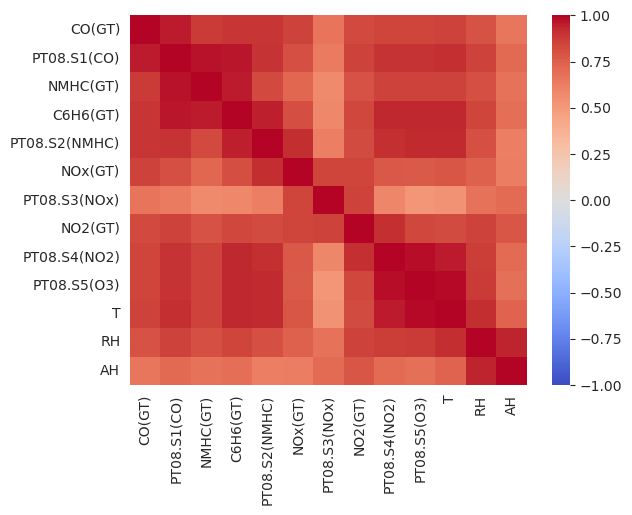

In [12]:
signal_correlations = filtered_data_df.corr()

fig = sns.heatmap(signal_correlations, annot=False, cmap="coolwarm", vmin=-1, vmax=1)


In [13]:
highly_corr_filtered_data_columns = correlation.get_high_corr_features_df(filtered_data_df, 0.9)

highly_corr_filtered_data = filtered_data_df[list(highly_corr_filtered_data_columns)]
highly_corr_filtered_data.head()

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,579.930382,437.021021,367.160737,514.785560,582.724787,1025.468552,880.624119,389.417482,93.591043,21.289430
1,575.306406,427.290850,353.042898,497.939277,575.951781,991.146818,841.102245,369.826151,89.983562,21.342617
2,575.966976,420.260656,340.612740,485.170832,571.946417,979.277890,832.091428,367.680215,90.893365,22.359441
3,564.425882,406.519414,326.264877,471.595870,569.315495,978.085494,837.638983,373.788403,93.645554,23.559908
4,534.792415,380.206010,300.837518,442.578942,562.586219,944.747235,802.776377,358.236504,91.083795,23.725046


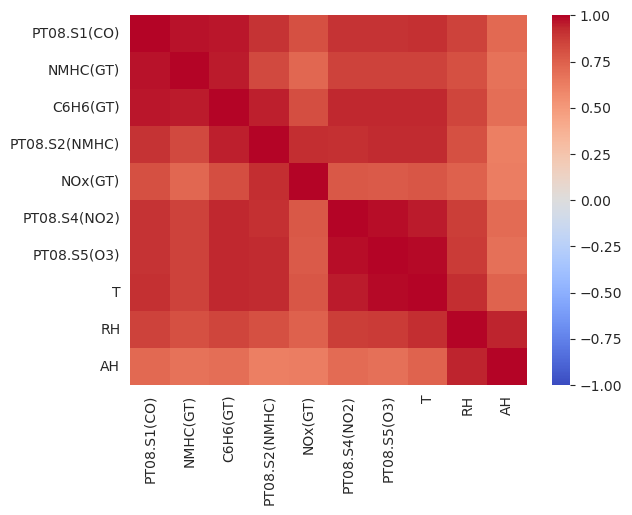

In [14]:
signal_correlations = highly_corr_filtered_data.corr()

fig = sns.heatmap(signal_correlations, annot=False, cmap="coolwarm", vmin=-1, vmax=1)

## Step 3: Properties Extraction

### SMA (Simple Moving Average)

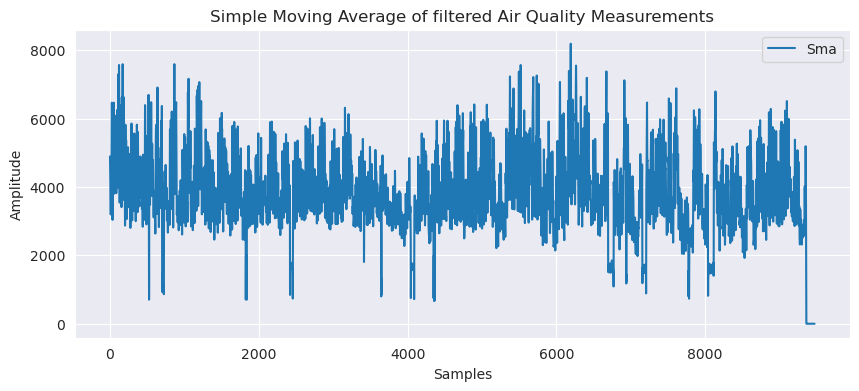

In [15]:
sma = properties.sma_signal(highly_corr_filtered_data.values)

fig = visualization.plot_signal(
    sma,
    title="Simple Moving Average of filtered Air Quality Measurements",
    channels=["Sma"]
)

### Magnitude

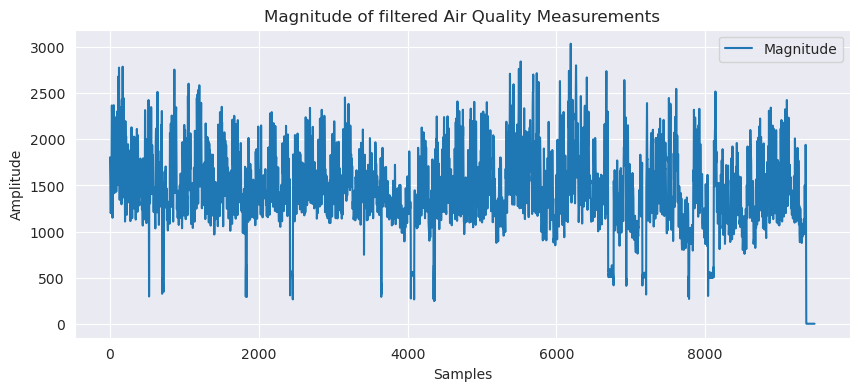

In [16]:
mag = properties.magnitude_signal(highly_corr_filtered_data.values)

fig = visualization.plot_signal(
    mag,
    title="Magnitude of filtered Air Quality Measurements",
    channels=["Magnitude"]
)

### Rolling RMS

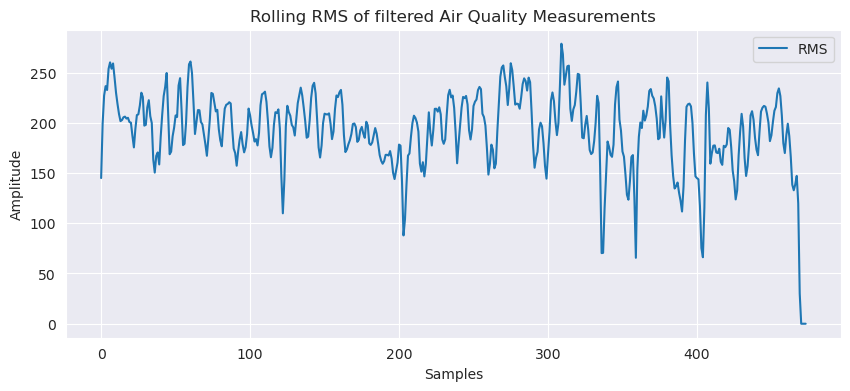

In [19]:
roll_rms = properties.rolling_rms(
    highly_corr_filtered_data.values,
    50,
    20
)

fig = visualization.plot_signal(
    roll_rms,
    title="Rolling RMS of filtered Air Quality Measurements",
    channels=["RMS"]
)


### Rolling Zero Crossing Rate

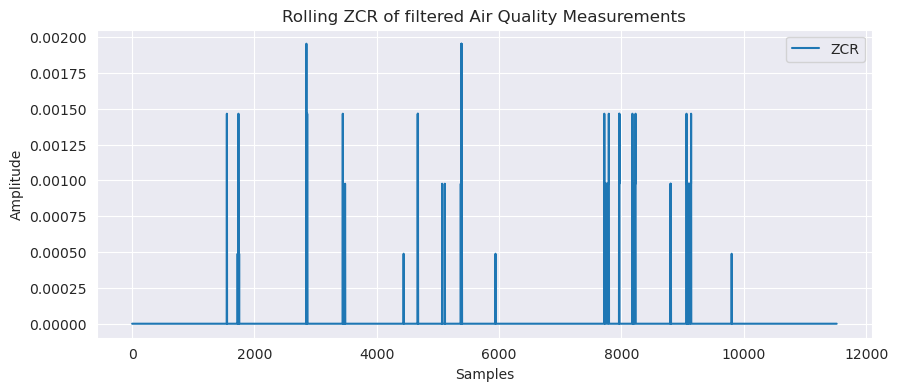

In [18]:
roll_zcr = properties.rolling_zcr(highly_corr_filtered_data.values.T)  # Transpose to have channels as rows (inverse matrix)

fig = visualization.plot_signal(
    roll_zcr.T,  # Transpose back to have channels as columns
    title="Rolling ZCR of filtered Air Quality Measurements",
    channels=["ZCR"]
)